<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/0701%EC%8B%A4%EC%8A%B5(%EC%82%AC%EC%B6%9C%EC%84%B1%ED%98%95%EA%B8%B0)_%EC%A4%80%EC%A7%80%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 오토인코더
2. 랜덤포레스트
3. 심층신경망
4. 서포트 벡터 머신
5. 가우시안 나이브 베이즈

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras import backend as k
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout
from google.colab import drive
moldset_labeled = pd.read_csv(r'/content/moldset_labeled.csv', low_memory=False, index_col=0)

In [ ]:
moldset_labeled['EQUIP_NAME'].value_counts()

650톤-우진2호기    2607
Name: EQUIP_NAME, dtype: int64

In [ ]:
parts = ['86141AA000', '86131AA000', '86141T1000', '86131T1000']
moldset_labeled['PART_NO'].value_counts()  #결과는 아래에서 확인 가능하다.

86141AA000    713
86131AA000    712
86141T1000    591
86131T1000    591
Name: PART_NO, dtype: int64

In [ ]:
#dataframe 이름을 사용
moldset_labeled.head() #결과는 아래에서 확인 가능하다.

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.5,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,0.0,0.0,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,86131AA000,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,86131AA000,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.5,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,0.0,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.5,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,0.0,25.000000,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#불필요한 특성을 dataframe에서 삭제함.
moldset_labeled.drop(columns={'_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'Reason', 
                         "Mold_Temperature_1", "Mold_Temperature_2", "Barrel_Temperature_7", "Switch_Over_Position",
                         "Mold_Temperature_5", "Mold_Temperature_6", "Mold_Temperature_7", "Mold_Temperature_8", "Mold_Temperature_9", "Mold_Temperature_10",
                          "Mold_Temperature_11", "Mold_Temperature_12"}, inplace=True)

In [ ]:
moldset_unlabeled = pd.read_csv(r'unlabeled_data.csv', index_col=0)

In [ ]:
#불필요한 특성을 dataframe에서 삭제함.
moldset_unlabeled.drop(columns={'_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 
'ERR_FACT_QTY',
                         "Mold_Temperature_1", "Mold_Temperature_2", "Barrel_Temperature_7", "Switch_Over_Position",
                         "Mold_Temperature_5", "Mold_Temperature_6", "Mold_Temperature_7", "Mold_Temperature_8", "Mold_Temperature_9", "Mold_Temperature_10",
                          "Mold_Temperature_11", "Mold_Temperature_12"}, inplace=True)

In [ ]:
#사출성형 시 분석하는 제품을 제품 코드로 선택 후 데이터셋을 분리함
moldset_labeled_cn7 = moldset_labeled[(moldset_labeled['PART_NO']=='86131AA000') | (moldset_labeled['PART_NO']=='86141AA000')]
moldset_labeled_cn7.drop(columns={'PART_NO'}, inplace=True)

moldset_labeled_rg3 = moldset_labeled[(moldset_labeled['PART_NO']=='86131T1000') | (moldset_labeled['PART_NO']=='86141T1000')]
moldset_labeled_rg3.drop(columns={'PART_NO'}, inplace=True)

moldset_unlabeled_cn7 = moldset_unlabeled[(moldset_unlabeled['PART_NO']=='86131AA000') | (moldset_unlabeled['PART_NO']=='86141AA000')]
moldset_unlabeled_cn7.drop(columns={'PART_NO'}, inplace=True)

moldset_unlabeled_rg3 = moldset_unlabeled[(moldset_unlabeled['PART_NO']=='86131T1000') | (moldset_unlabeled['PART_NO']=='86141T1000')]
moldset_unlabeled_rg3.drop(columns={'PART_NO'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
moldset_unlabeled_cn7.describe() #결과는 아래에서 확인 가능하다.

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000,52547.000000
mean,6.424337,4.218894,10.436911,50.905432,5.141773,359.175364,52.581079,434.434858,56.389434,16.472642,156.852229,116.631891,99.514623,22.642434,27.234318,145.529239,267.087272,268.502999,265.401555,254.059596,233.254549,57.740971,12.841428,14.730523
std,3.020516,1.444531,7.396193,13.369645,1.868678,317.320806,13.087495,235.942618,29.437641,15.334763,145.803204,36.478173,29.089798,18.952520,29.014509,135.601133,11.345312,10.124143,8.909881,7.613118,6.257067,10.945172,12.181921,14.162900
min,1.000000,0.300000,0.500000,0.000000,2.800000,15.800000,32.180000,0.000000,25.100000,0.000000,0.000000,73.800000,68.800000,0.000000,0.000000,0.000000,244.200000,231.600000,239.100000,234.400000,219.200000,34.300000,0.000000,0.000000
25%,5.000000,3.890000,2.800000,36.600000,3.200000,17.300000,40.300000,485.900000,36.500000,0.000000,0.000000,80.100000,69.900000,3.900000,0.000000,0.000000,264.600000,264.900000,264.800000,254.600000,229.800000,57.800000,0.000000,0.000000
50%,5.000000,4.490000,12.810000,59.520000,5.990000,653.410000,52.660000,522.200000,49.900000,30.300000,290.300000,139.700000,106.700000,17.900000,12.200000,245.100000,264.900000,269.900000,269.400000,255.000000,234.700000,61.600000,20.500000,22.000000
75%,9.560000,5.000000,16.860000,63.600000,7.120000,653.560000,68.470000,647.990000,56.100000,30.700000,292.400000,141.800000,136.300000,38.400000,59.300000,276.100000,275.400000,275.000000,270.500000,259.600000,239.900000,65.200000,23.400000,26.700000
max,11.400000,6.000000,97.080000,119.880000,7.270000,655.330000,75.750000,652.000000,128.200000,62.900000,370.100000,187.000000,141.900000,97.400000,112.900000,287.500000,286.200000,285.800000,279.000000,267.200000,242.800000,73.400000,38.600000,48.600000


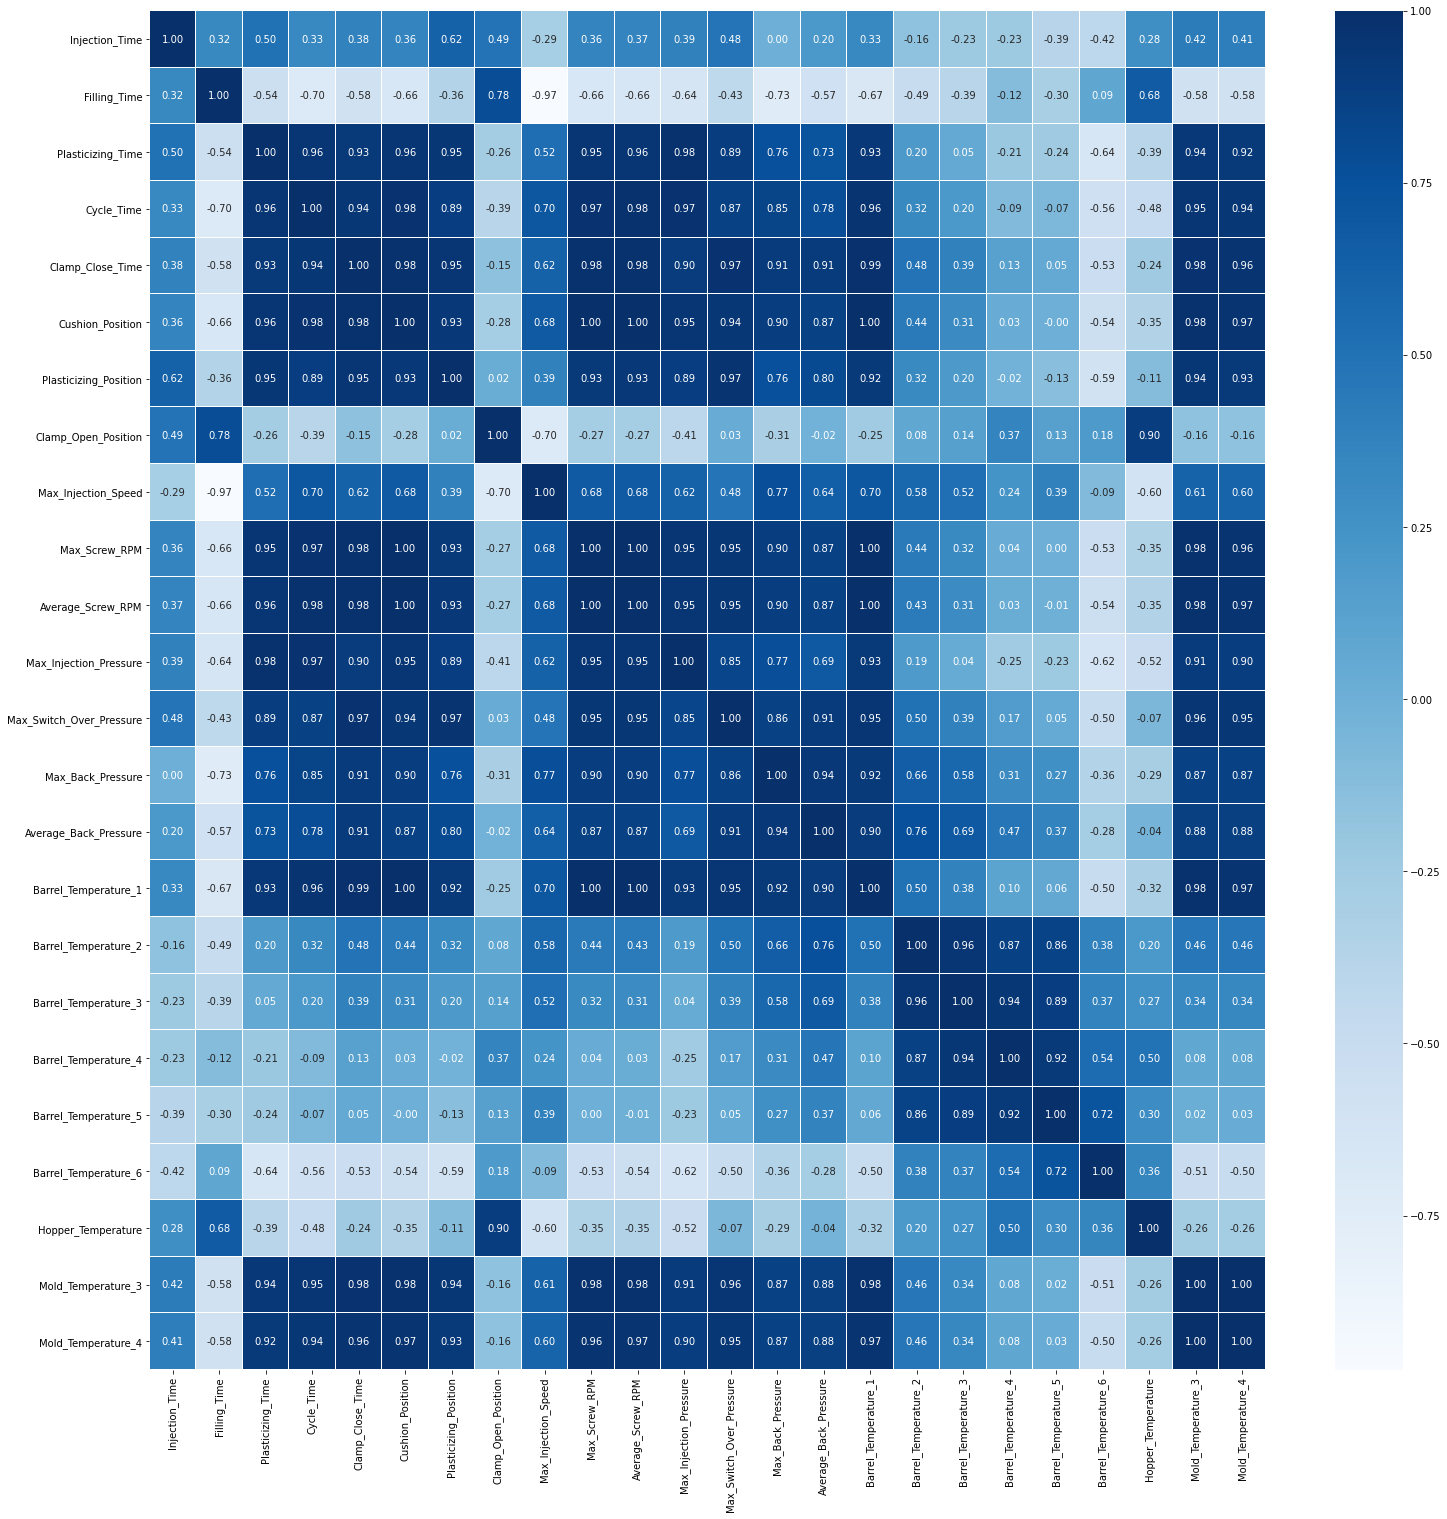

In [ ]:
import seaborn as sns

plt.subplots(figsize=(25,25))
sns.heatmap(data = moldset_unlabeled_cn7.corr(), linewidths=0.1,annot=True, fmt ='.2f', cmap='Blues')

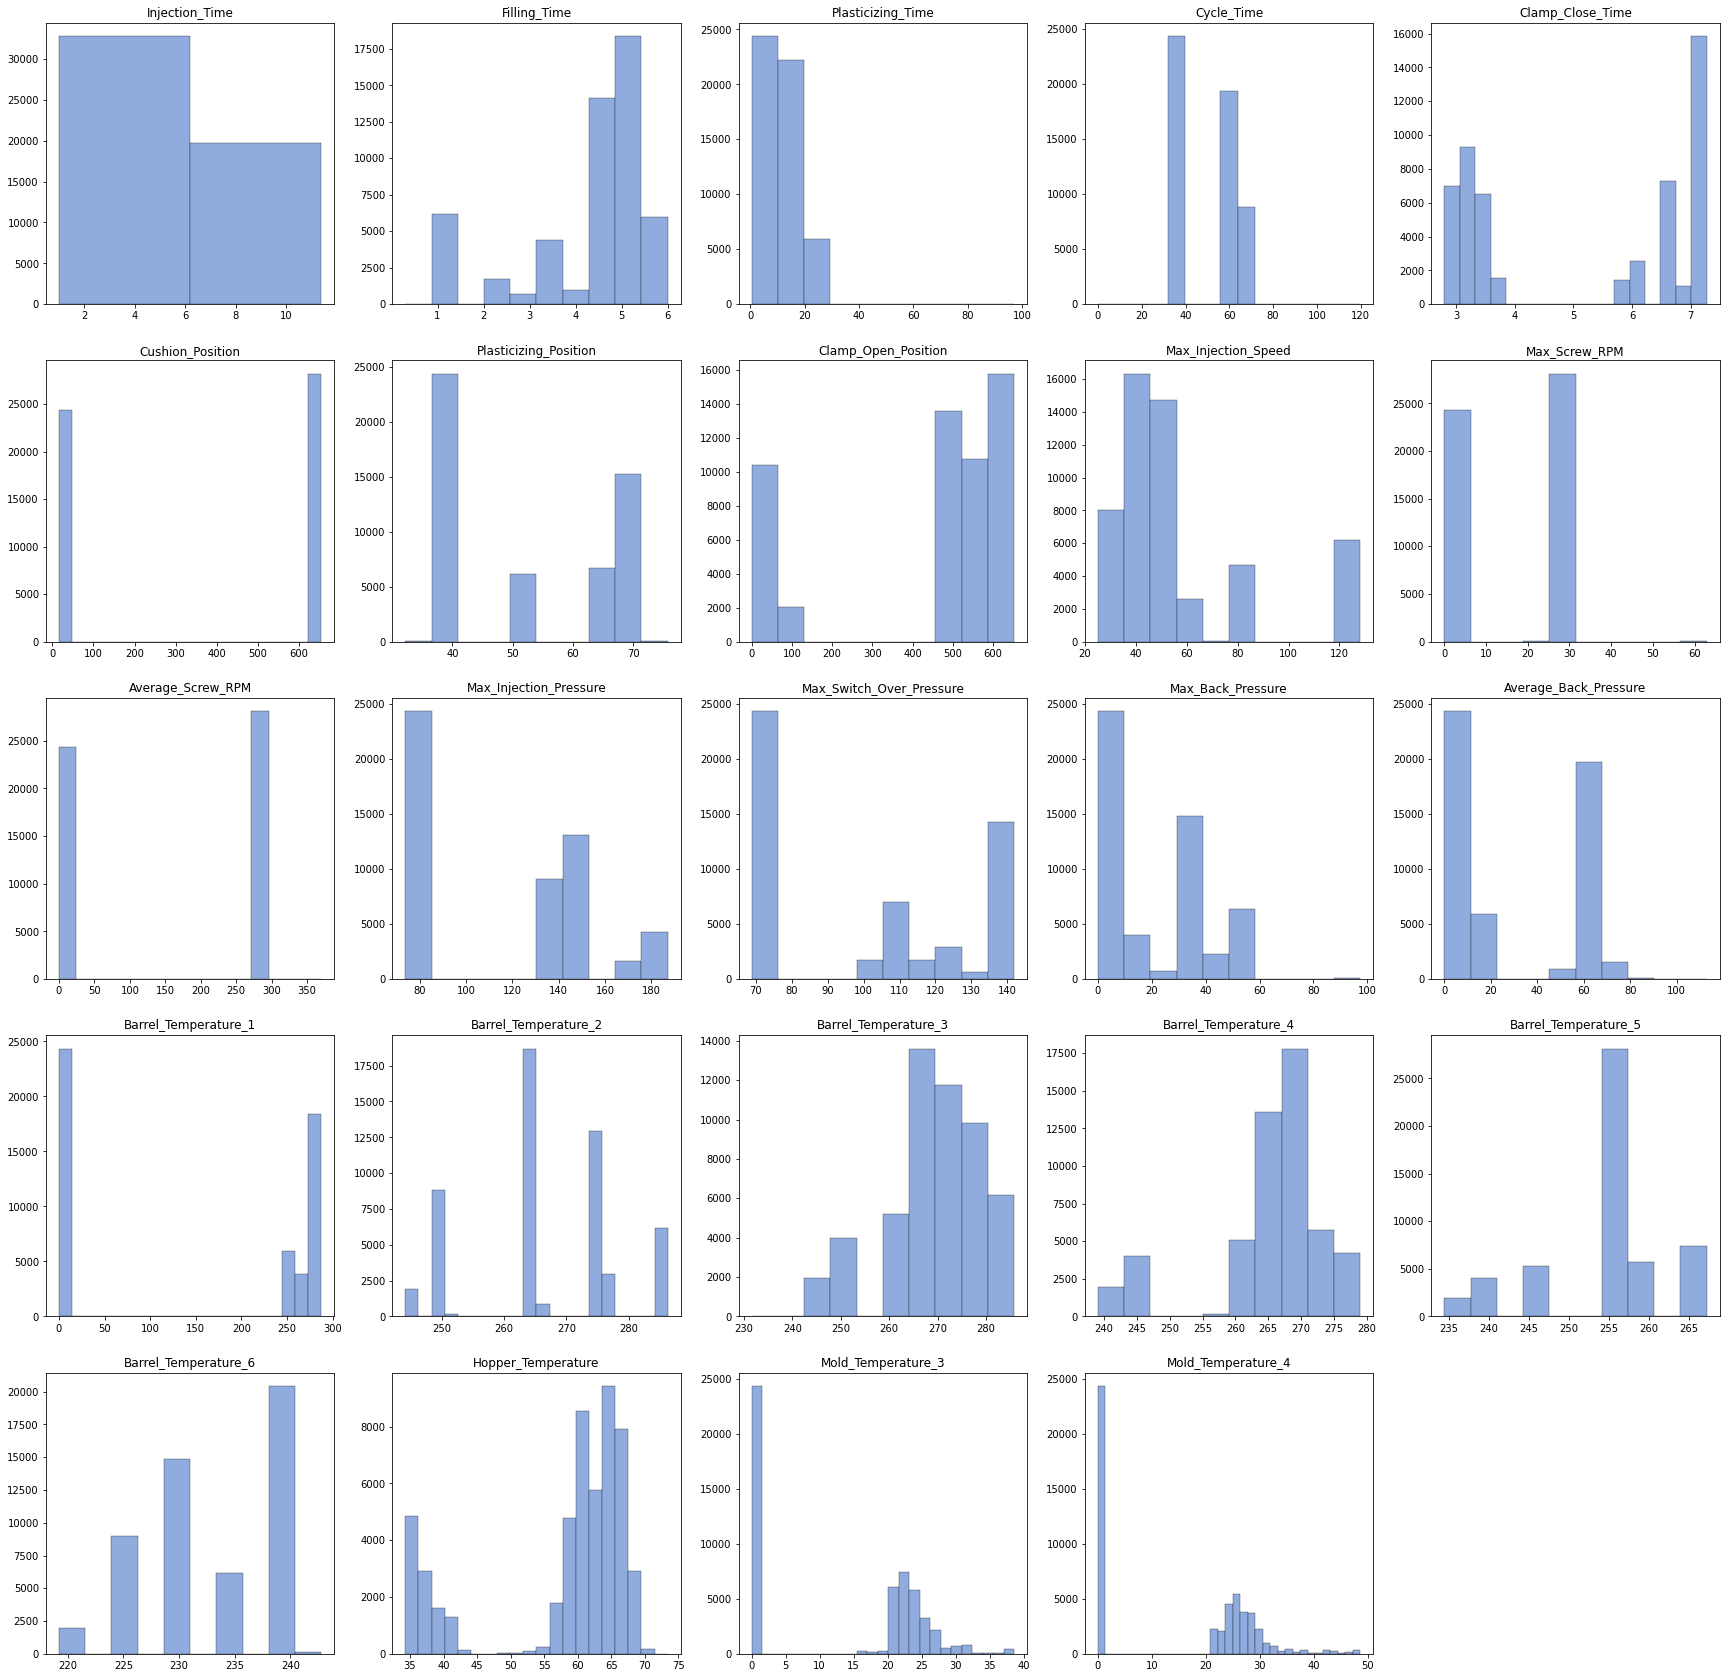

In [ ]:
plt.figure(figsize = (30,30))

# 각 변수의 막대그래프 개수
bin = [2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,20,10,10,10,10,20,25,35,35] 

for index, value in enumerate(moldset_unlabeled_cn7):
    sub = plt.subplot(5,5,index +1) 
    sub.hist(moldset_unlabeled_cn7[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor ='black')
    plt.title(value) #결과는 아래에서 확인 가능하다.

In [ ]:
moldset_unlabeled_rg3.describe() #결과는 아래에서 확인 가능하다.

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.00000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000,37477.000000
mean,3.515335,2.778947,9.631108,53.469702,5.357147,405.104732,48.223423,209.289599,86.657328,20.604886,179.079350,121.84281,97.877082,32.113184,36.580767,169.379563,273.179625,274.535830,269.174136,259.571657,235.694215,58.029599,14.053569,15.813630
std,2.837536,2.087176,6.238300,12.758191,1.633415,310.466273,7.846830,243.368693,41.854656,18.345535,145.771792,35.08609,52.450084,24.235511,33.234145,136.544147,12.796782,12.004843,9.526382,8.061772,4.830513,9.782343,11.607758,13.580681
min,0.130000,0.000000,0.400000,0.000000,2.800000,0.000000,33.350000,0.000000,0.000000,0.000000,0.000000,0.00000,69.100000,0.000000,0.000000,0.000000,244.200000,234.400000,239.100000,234.400000,219.500000,33.200000,0.000000,0.000000
25%,1.050000,0.930000,2.900000,38.900000,3.400000,18.700000,40.500000,4.630000,39.900000,0.000000,0.000000,80.70000,70.000000,5.200000,0.000000,0.000000,264.800000,269.900000,269.800000,259.800000,234.800000,58.000000,0.000000,0.000000
50%,2.630000,1.650000,12.800000,61.760000,6.640000,654.250000,52.540000,35.630000,79.500000,30.700000,290.400000,140.30000,111.700000,31.300000,58.200000,246.000000,265.400000,270.100000,270.200000,260.300000,235.100000,61.300000,20.500000,22.000000
75%,5.000000,5.000000,13.030000,63.600000,6.740000,654.280000,53.570000,522.100000,127.500000,30.900000,290.600000,142.50000,116.000000,56.000000,60.800000,286.000000,285.100000,285.000000,275.200000,265.000000,239.900000,64.100000,22.400000,24.000000
max,11.390000,6.000000,38.710000,76.190000,15.100000,655.160000,72.760000,654.990000,128.800000,62.900000,373.300000,186.90000,6553.100000,94.800000,136.000000,287.600000,286.700000,286.000000,278.100000,266.900000,241.000000,71.200000,34.800000,45.900000


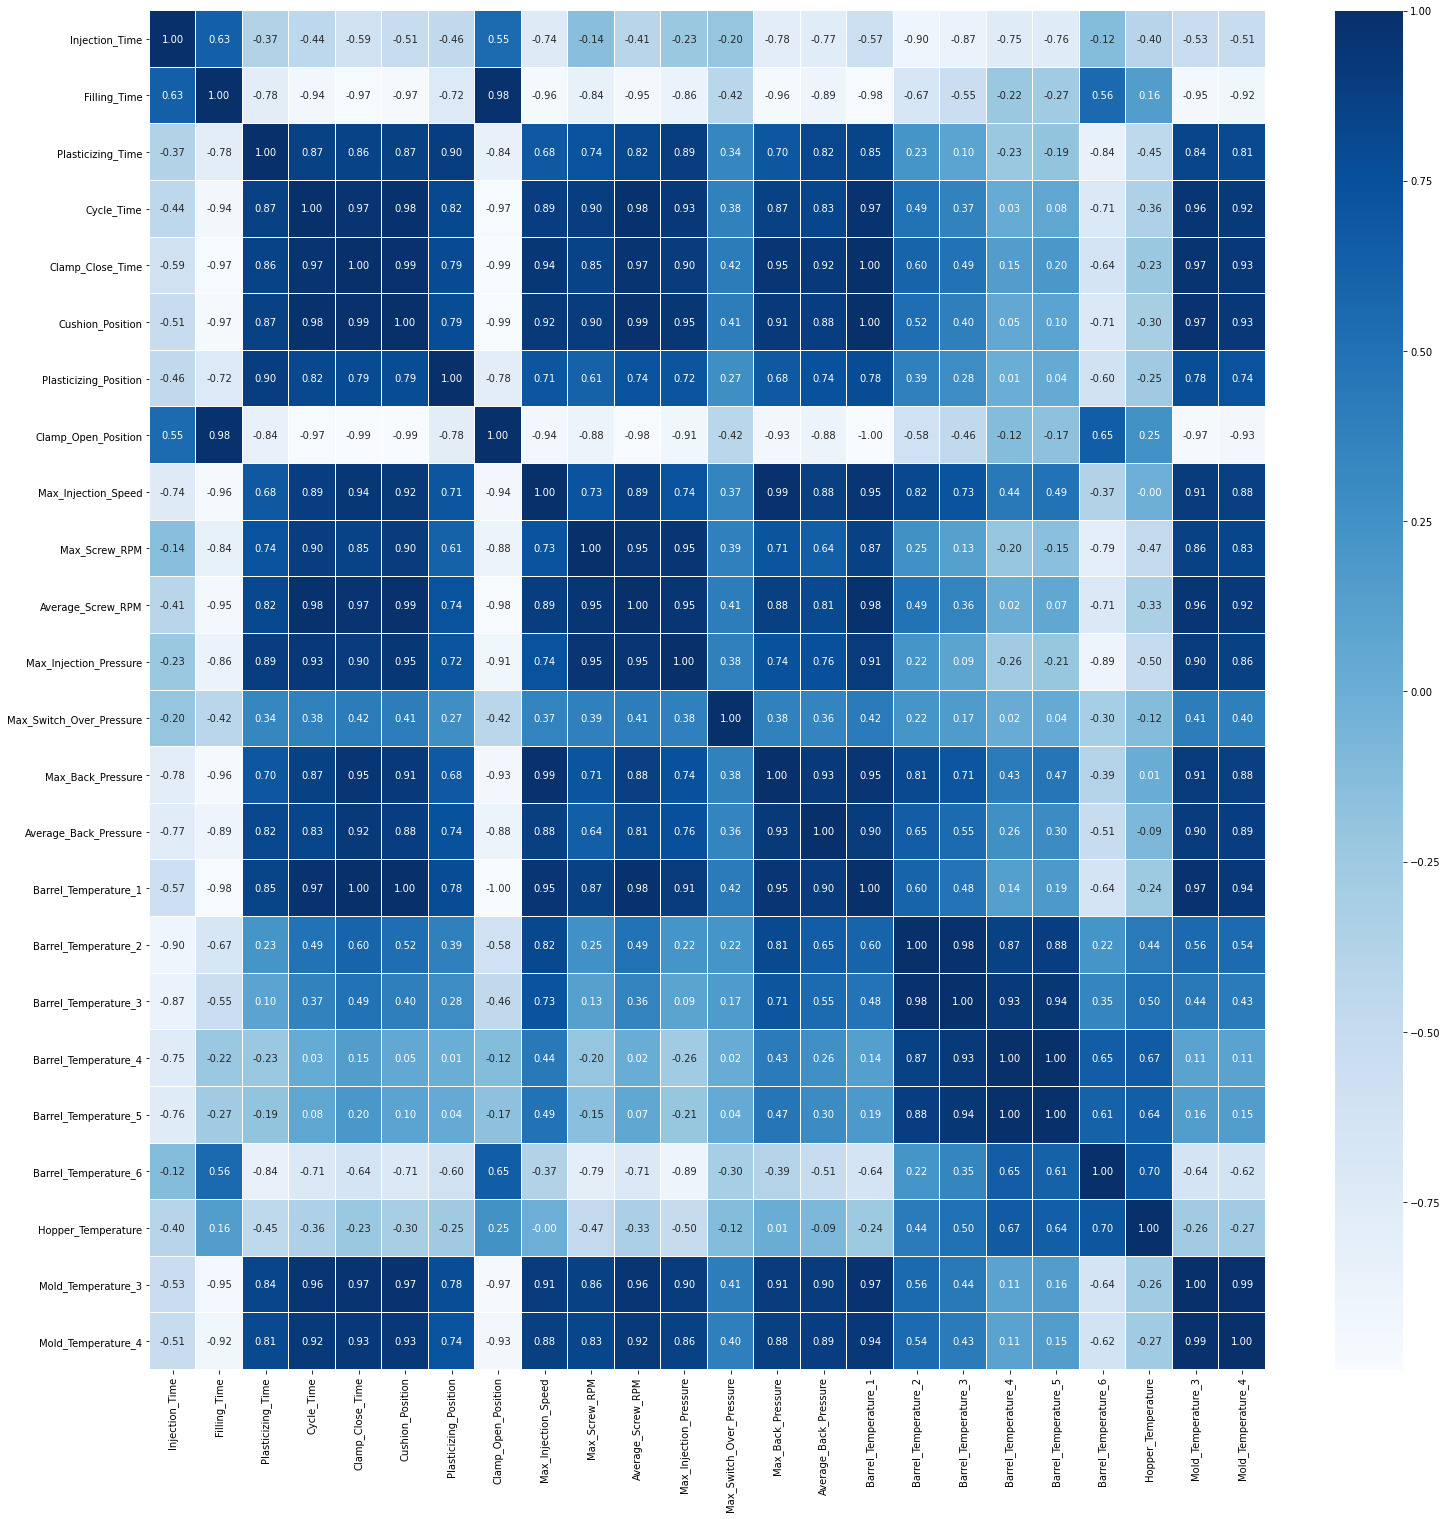

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(data = moldset_unlabeled_rg3.corr(), linewidths=0.1,annot=True, fmt ='.2f', cmap='Blues')

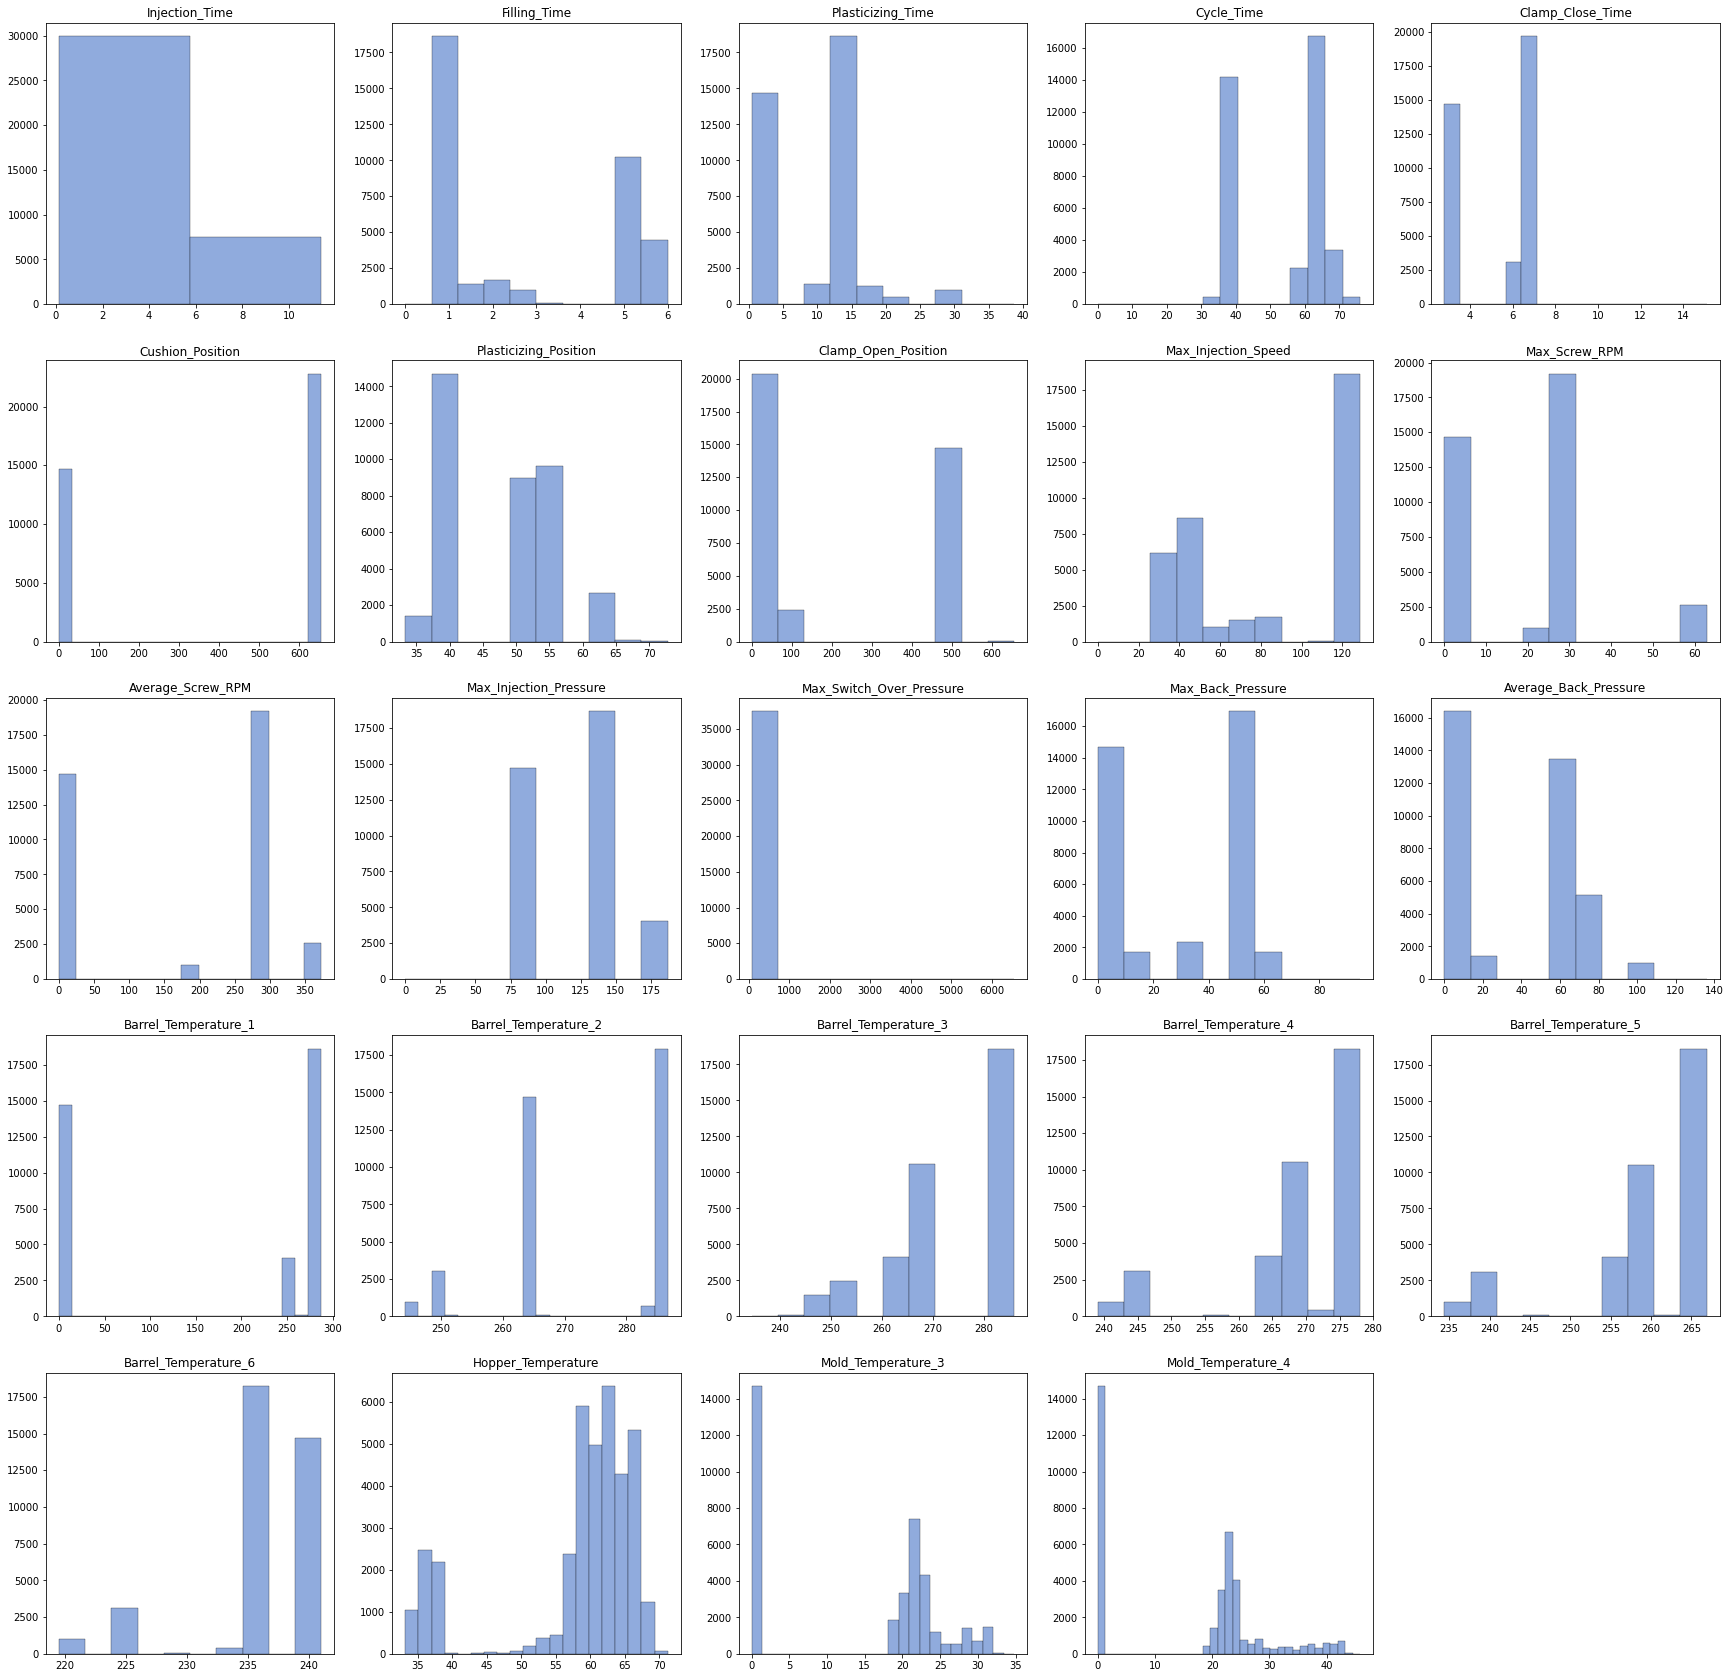

In [ ]:
plt.figure(figsize = (30,30))

# 각 변수의 막대그래프 개수
bin = [2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,20,10,10,10,10,20,25,35,35] 

for index, value in enumerate(moldset_unlabeled_rg3):
    sub = plt.subplot(5,5,index +1) 
    sub.hist(moldset_unlabeled_rg3[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor ='black')
    plt.title(value)  #결과는 아래에서 확인 가능하다.

In [ ]:
moldset_labeled_rg3['PassOrFail'] = moldset_labeled_rg3['PassOrFail'].map({0:int(0), 1:int(1)})
moldset_labeled_cn7['PassOrFail'] = moldset_labeled_cn7['PassOrFail'].map({0:int(0), 1:int(1)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
labeled_data = [moldset_labeled_cn7, moldset_labeled_rg3]
for d in labeled_data:
    print('양품 수: {}'.format(d[d['PassOrFail']==0].shape[0]))
    print('불량품 수: {}'.format(d[d['PassOrFail']==1].shape[0]))
    print('='*10) #결과는 아래에서 확인 가능하다.

양품 수: 1398
불량품 수: 27
양품 수: 1157
불량품 수: 25


In [ ]:
from sklearn.preprocessing import StandardScaler

data = [moldset_labeled_cn7, moldset_labeled_rg3, moldset_unlabeled_cn7, moldset_unlabeled_rg3]
for d in data:
    for column in d.columns:
        if column !='PassOrFail':
            sc = StandardScaler()
            d[[column]] = sc.fit_transform(d[[column]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
moldset_labeled_cn7.to_csv(r'moldset_labeled_cn7.csv')
moldset_labeled_rg3.to_csv(r'moldset_labeled_rg3.csv')

In [ ]:
def confident_prediction(df):
    result = []
    
    for i in range(len(df)):
        if df[i][0] >= df[i][1]:
            result.append(df[i][0])
        else:
            result.append(df[i][1])     
    return result

In [ ]:
#심층 신경망에서 사용
def confident_prediction_1(df):
    result = []
    
    for i in range(len(df)):
        if df[i] >=0.5:
            result.append(df[i])
        else:
            result.append(1-df[i])
    return result

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score, confusion_matrix

def evaluation(y,y_pred):
    print("Accuracy: {:.2f}".format(accuracy_score(y,y_pred)))
    print("Precision: {:.2f}".format(precision_score(y,y_pred)))
    print("Recall: {:.2f}".format(recall_score(y,y_pred)))
    print(roc_auc_score(y,y_pred))
    print(f1_score(y,y_pred))
    print(confusion_matrix(y,y_pred))

In [ ]:
class DataLoader():
    
    def __init__(self):
        #클래스 변수가 존재하는 데이터를 불러옴
        moldset_labeled = pd.read_csv(r'./moldset_labeled_cn7.csv', low_memory=False, index_col=False)
        moldset_labeled.drop(columns={'Unnamed: 0'}, inplace=True)
        #클래스 변수가 존재하지 않는 데이터를 불러옴
        moldset_unlabeled = pd.read_csv(r'./moldset_unlabeled_cn7.csv', low_memory=False, index_col=False)
        moldset_unlabeled.drop(columns={'Unnamed: 0'}, inplace=True)
        #평가 데이터의 비율을 test_size로 지정함
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
        for train_index, test_index in sss.split(moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'], moldset_labeled['PassOrFail']):
            moldset_labeled_train_X = moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'].iloc[train_index]
            moldset_labeled_test_X = moldset_labeled.loc[:, moldset_labeled.columns!='PassOrFail'].iloc[test_index]
            moldset_labeled_train_Y = moldset_labeled['PassOrFail'].iloc[train_index]
            moldset_labeled_test_Y = moldset_labeled['PassOrFail'].iloc[test_index]
        #학습데이터
        self.moldset_labeled_train_X = moldset_labeled_train_X
        #평가데이터
        self. moldset_labeled_test_X =  moldset_labeled_test_X
        #학습데이터의 클래스 변수
        self.moldset_labeled_train_Y = moldset_labeled_train_Y
        #평가데이터의 클래스 변수
        self.moldset_labeled_test_Y = moldset_labeled_test_Y
        #클래스 변수가 없는 데이터
        self.moldset_unlabeled = moldset_unlabeled

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.svm import SVC
#탐색할 하이퍼 파라미터의 최대, 최소 범위를 설정한다.
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [i*1e-4 for i in range(1, 100)], 'C': [i*1e-4 for i in range(1, 100)]}]
scores = ['accuracy','precision', 'recall']
weights = {0:100.0, 1:1.0}
#층화추출법을 활용하여 클래스 별 비율이 유지되도록 한다.
kf = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)
X = pd.read_csv(r'./moldset_labeled_cn7.csv', low_memory=False, index_col=False)
X.drop(columns={'Unnamed: 0'}, inplace=True)
y = X.pop('PassOrFail')
for score in scores:
    clf = GridSearchCV(SVC(class_weight=weights), scoring=score, param_grid=tuned_parameters, n_jobs=-1, cv=kf, refit=True, verbose=0)
    clf.fit(X, y)
	#최적의 하이퍼 파라미터 짝을 반환한다.
    print('Best Params: {}'.format(clf.best_params_))   #결과는 아래에서 확인 가능하다.

Best Params: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Params: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Params: {'C': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
#7-1-1. 모델 학습 및 평가 함수 가이드
def train_and_evaluate(percentage=10, unlabeled_usage=90):
    
    data = DataLoader()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = data.moldset_unlabeled
    without_label = moldset_unlabeled
    
	#남은 클래스 변수가 존재하지 않는 데이터의 개수
    num_left_unlabeled =int(moldset_unlabeled.shape[0]*(100-unlabeled_usage)*0.01)
    
    #7-1-2. 구현된 모델 불러오기 / 모델 정의 가이드
    while True:
        if without_label.shape[0] >= num_left_unlabeled:
			#클래스 별 데이터 비율
            weights = {0:100.0, 1:1.0}
			#최적의 하이퍼 파라미터 사용
            model = SVC(C=0.001, kernel='rbf', gamma=1e-2, class_weight=weights, probability=True, random_state=42)
            model.fit(X_with_label, Y_with_label)
            y_pred = model.predict(X_test)
            evaluation(Y_test, y_pred)

            #7-1-3. Unlabeled 데이터에 대한 예측
            prob = model.predict_proba(without_label)
            confident_prob = confident_prediction(prob)
            confident_prediction(prob)
            without_label['confidence'] = confident_prob
            
            #이 과정에서 내림차순 정렬
            without_label = without_label.sort_values(by=['confidence'], ascending=False)
            length = without_label.shape[0]
            cutting_index =int(length*(percentage*0.01))
            chosen_without_label = without_label.iloc[:cutting_index, :]
            chosen_without_label.drop(columns={'confidence'}, inplace=True)
            notchosen_without_label = without_label.iloc[cutting_index:, :].drop(columns={'confidence'})
            pseudo_label =  pd.DataFrame(model.predict(chosen_without_label))

   	    #7-1-4. Labeled 데이터와 통합 후 학습
            #데이터 업데이트
            X_with_label = pd.concat([X_with_label, chosen_without_label])
            Y_with_label = pd.concat([Y_with_label, pseudo_label])
            without_label = notchosen_without_label
            y_pred = model.predict(X_test)
            evaluation(Y_test, y_pred)
            
        else:
            print()
            print("ALL DONE, UNLABELED USED: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
            break   #결과는 아래에서 확인 가능하다.

In [ ]:
train_and_evaluate()

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and be

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and be

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-ve

Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]
Accuracy: 0.98
Precision: 0.00
Recall: 0.00
0.5
0.0
[[420   0]
 [  8   0]]

ALL DONE, UNLABELED USED: 99%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def predict(df):
    result = []
    
    for i in range(len(df)):
        if df[i] >=0.5:
            result.append(1)
        else:
            result.append(0)
    return result  

In [ ]:
#8-1-1. Keras Package를 활용하여 학습에 필요한 변수 생성
def train_and_evaluate(percentage=10, unlabeled_usage=90):
    data = DataLoader()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = data.moldset_unlabeled
    without_label = moldset_unlabeled
	#남은 클래스 변수가 존재하지 않는 데이터의 개수
    num_left_unlabeled =int(moldset_unlabeled.shape[0]*(100-unlabeled_usage)*0.01)
    
    #8-1-2. 신경망을 순차적으로 쌓음
    model = Sequential()
	#units은 출력 차원 수
    model.add(Dense(units=32, activation='relu', input_dim=24))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
    
    #8-1-3. 심층 신경망 모델을 이용하여 학습 진행하기
    while True:
        if without_label.shape[0] >= num_left_unlabeled:     
            val_precision =0
            val_recall =0
            patience =10
            cnt =0
            
            for epoch in range(20):
                history = model.fit(X_with_label, Y_with_label, epochs=1, validation_split=0.3)
                history = history.history  
                if cnt>= patience:
                    break
                if  history['val_precision'][0] >= val_precision and history['val_recall'][0] >= val_recall:
                    val_precision = history['val_precision'][0]
                    val_recall = history['val_recall'][0]
                    cnt =0
                else:
                    cnt+=1
            
            #8-1-4. 학습시킨 모델을 이용하여 목표값이 없는 데이터에 대한 예측 실행       
            prob = model.predict_proba(without_label)
            confident_prob = confident_prediction_1(prob)
            without_label['confidence'] = confident_prob
            without_label = without_label.sort_values(by=['confidence'], ascending=False)
            length = without_label.shape[0]
            cutting_index =int(length*(percentage*0.01))
            chosen_without_label = without_label.iloc[:cutting_index, :]
            chosen_without_label.drop(columns={'confidence'}, inplace=True)
            notchosen_without_label = without_label.iloc[cutting_index:, :].drop(columns={'confidence'})
            pseudo_label =  pd.DataFrame(predict(model.predict(chosen_without_label)))
            
            #8-1-5. UPDATE
            X_with_label = pd.concat([X_with_label, chosen_without_label])
            Y_with_label = pd.concat([Y_with_label, pseudo_label])
            without_label = notchosen_without_label
            
        else:
            print()
            print("ALL DONE, UNLABELED USED: {:.0%}".format(without_label.shape[0]/num_left_unlabeled))
            model.save('NN_rg3.h5')
            break       #결과는 아래에서 확인 가능하다.

In [ ]:
train_and_evaluate()

22/22 [==============================] - 0s 8ms/step - loss: 0.0114 - accuracy: 0.9957 - precision: 0.9167 - recall: 0.8462 - val_loss: 0.0548 - val_accuracy: 0.9867 - val_precision: 0.6667 - val_recall: 0.6667


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


99/99 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.9984 - precision: 0.9375 - recall: 0.7895 - val_loss: 1.7930e-30 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


169/169 [==============================] - 1s 4ms/step - loss: 0.0016 - accuracy: 0.9985 - precision: 0.7895 - recall: 0.7895 - val_loss: 5.8609e-38 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


231/231 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 0.9992 - precision: 1.0000 - recall: 0.6842 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


287/287 [==============================] - 1s 4ms/step - loss: 9.0760e-04 - accuracy: 0.9993 - precision: 1.0000 - recall: 0.6842 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


338/338 [==============================] - 1s 4ms/step - loss: 7.7546e-04 - accuracy: 0.9994 - precision: 1.0000 - recall: 0.6842 - val_loss: 1.2085e-08 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


383/383 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9994 - precision: 0.7727 - recall: 0.8947 - val_loss: 1.0452e-06 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


424/424 [==============================] - 1s 4ms/step - loss: 6.1708e-04 - accuracy: 0.9993 - precision: 0.9894 - recall: 0.9915 - val_loss: 0.0093 - val_accuracy: 0.9995 - val_precision: 0.9993 - val_recall: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


461/461 [==============================] - 2s 3ms/step - loss: 5.6585e-04 - accuracy: 0.9995 - precision: 0.9988 - recall: 0.9964 - val_loss: 0.0519 - val_accuracy: 0.9926 - val_precision: 0.9853 - val_recall: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


494/494 [==============================] - 2s 3ms/step - loss: 5.3613e-04 - accuracy: 0.9996 - precision: 1.0000 - recall: 0.9975 - val_loss: 0.0010 - val_accuracy: 0.9999 - val_precision: 1.0000 - val_recall: 0.9997


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


524/524 [==============================] - 2s 4ms/step - loss: 4.9734e-04 - accuracy: 0.9995 - precision: 0.9978 - recall: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9999 - val_precision: 1.0000 - val_recall: 0.9997


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


551/551 [==============================] - 2s 3ms/step - loss: 4.7726e-04 - accuracy: 0.9997 - precision: 0.9980 - recall: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9999 - val_precision: 1.0000 - val_recall: 0.9998


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


575/575 [==============================] - 2s 3ms/step - loss: 4.5157e-04 - accuracy: 0.9997 - precision: 0.9987 - recall: 1.0000 - val_loss: 1.0473e-13 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


  1/597 [..............................] - ETA: 2s - loss: 9.9242e-25 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


597/597 [==============================] - 2s 4ms/step - loss: 4.3670e-04 - accuracy: 0.9997 - precision: 0.9986 - recall: 1.0000 - val_loss: 9.6041e-04 - val_accuracy: 0.9999 - val_precision: 1.0000 - val_recall: 0.9998


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


617/617 [==============================] - 2s 4ms/step - loss: 4.2289e-04 - accuracy: 0.9994 - precision: 0.9987 - recall: 0.9987 - val_loss: 0.0016 - val_accuracy: 0.9999 - val_precision: 1.0000 - val_recall: 0.9998


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


  1/634 [..............................] - ETA: 2s - loss: 3.2976e-23 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


634/634 [==============================] - 2s 3ms/step - loss: 4.1100e-04 - accuracy: 0.9996 - precision: 0.9992 - recall: 0.9992 - val_loss: 0.0014 - val_accuracy: 0.9999 - val_precision: 1.0000 - val_recall: 0.9998


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


  1/650 [..............................] - ETA: 2s - loss: 4.4495e-20 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


650/650 [==============================] - 2s 3ms/step - loss: 3.9548e-04 - accuracy: 0.9997 - precision: 0.9992 - recall: 0.9994 - val_loss: 0.0015 - val_accuracy: 0.9997 - val_precision: 0.9994 - val_recall: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


  1/665 [..............................] - ETA: 2s - loss: 6.6171e-32 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


665/665 [==============================] - 3s 4ms/step - loss: 3.9508e-04 - accuracy: 0.9997 - precision: 0.9988 - recall: 1.0000 - val_loss: 0.0037 - val_accuracy: 0.9995 - val_precision: 0.9991 - val_recall: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


  1/677 [..............................] - ETA: 2s - loss: 1.1168e-10 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


677/677 [==============================] - 3s 4ms/step - loss: 3.7415e-04 - accuracy: 0.9998 - precision: 0.9991 - recall: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9997 - val_precision: 0.9994 - val_recall: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


  1/689 [..............................] - ETA: 5s - loss: 2.9129e-18 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


689/689 [==============================] - 3s 4ms/step - loss: 3.8268e-04 - accuracy: 0.9997 - precision: 0.9990 - recall: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9992 - val_precision: 1.0000 - val_recall: 0.9985


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


  1/699 [..............................] - ETA: 4s - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


699/699 [==============================] - 2s 3ms/step - loss: 3.7442e-04 - accuracy: 0.9997 - precision: 0.9990 - recall: 1.0000 - val_loss: 0.0438 - val_accuracy: 0.9984 - val_precision: 0.9974 - val_recall: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


  1/709 [..............................] - ETA: 2s - loss: 1.7331e-38 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


709/709 [==============================] - 2s 4ms/step - loss: 3.6798e-04 - accuracy: 0.9997 - precision: 0.9990 - recall: 0.9998 - val_loss: 0.0036 - val_accuracy: 0.9996 - val_precision: 0.9993 - val_recall: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '



ALL DONE, UNLABELED USED: 99%


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from tensorflow.keras.models import load_model

data = DataLoader()
Y_test = data.moldset_labeled_test_Y
X_test = data.moldset_labeled_test_X

model = load_model('NN_rg3.h5')

In [ ]:
y_pred = predict(model.predict(X_test))

evaluation(Y_test, y_pred)   #결과는 아래에서 확인 가능하다.

Accuracy: 0.99
Precision: 0.67
Recall: 0.75
0.8714285714285714
0.7058823529411765
[[417   3]
 [  2   6]]
